In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import random

In [4]:
path = os.getcwd() + '/historical_price'
stock08 = []
for file in os.listdir(path):
    file_path = path + '/' + file
    date = pd.read_csv(file_path)['t']
    if len(date)>0:
        stock08.append(file)
print(str(len(stock08))+" stocks selected")
print(stock08)

86 stocks selected
['SLB_2015-12-30_2021-02-21_minute.csv', 'XOM_2018-09-05_2021-02-21_minute.csv', 'CME_2015-12-30_2021-02-21_minute.csv', 'MPC_2015-12-30_2021-02-21_minute.csv', 'V_2018-09-05_2021-02-21_minute.csv', 'MCD_2018-09-05_2021-02-21_minute.csv', 'LUV_2015-12-30_2021-02-21_minute.csv', 'AVGO_2015-12-30_2021-02-21_minute.csv', 'PFE_2018-09-05_2021-02-21_minute.csv', 'TGT_2015-12-30_2021-02-21_minute.csv', 'TWTR_2015-12-30_2021-02-21_minute.csv', 'CVX_2015-12-30_2021-02-21_minute.csv', 'GOOGL_2015-12-30_2021-02-21_minute.csv', 'DIS_2018-09-05_2021-02-21_minute.csv', 'EBAY_2015-12-30_2021-02-21_minute.csv', 'QCOM_2015-12-30_2021-02-21_minute.csv', 'MRK_2018-09-05_2021-02-21_minute.csv', 'TSLA_2015-12-30_2021-02-21_minute.csv', 'CBOE_2015-12-30_2021-02-21_minute.csv', 'BIIB_2015-12-30_2021-02-21_minute.csv', 'GOOG_2015-12-30_2021-02-21_minute.csv', 'HD_2018-09-05_2021-02-21_minute.csv', 'TSN_2015-12-30_2021-02-21_minute.csv', 'HPQ_2015-12-30_2021-02-21_minute.csv', 'F_2015-12-30

Here we made a decision based on the data we were working with. We were given minute-data for 86 companies. This means that we have stock data each minute for each company. Sounds great, except for the fact that about half the values were missing (54% approximately). Additionally, about half of the stocks had data from 2015-present and the other half from 2018-present. To remedy this, we only selected data from 2018-present, and we averaged all the data from the day into one value, so we only have one number per day. This brought the "NaN" percentage down to approximately 4%. 

In [5]:
stock_price_dict = {}

for file in stock08 :
    path = os.getcwd() + '/historical_price/' + file
    df = pd.read_csv(path)
    df = df[df.t >= '2018-09-10']
    df['t'] = pd.to_datetime(df['t'], format='%Y-%m-%d')# utc = True)
    df = df.set_index(pd.DatetimeIndex(df['t']))
    df = df.resample('B').mean()
    stock_price_dict[file.split("_")[0]] = df['c']
    
stock_price_df = pd.DataFrame(stock_price_dict)


In [6]:

stock_price_df.head()

,SLB,XOM,CME,MPC,V,MCD,LUV,AVGO,PFE,TGT,...,UNH,REGN,ABBV,SO,COP,GE,AXP,NKE,T,BLK
t,,,,,,,,,,,,,,,,,,,,,
2018-09-10,60.311145,81.932425,174.692124,82.482906,143.956028,165.216732,62.472526,238.361631,42.285221,89.273637,...,261.477321,394.533749,94.109021,44.398581,71.327015,12.502553,107.318264,81.983461,32.366312,474.618565
2018-09-11,60.244793,82.744854,173.533108,83.287851,144.910183,165.235544,63.031790,233.494867,42.226678,89.203122,...,260.577685,393.133055,93.327339,44.178157,71.650950,12.376878,107.952227,82.964432,32.634145,471.593221
2018-09-12,61.113295,83.300310,171.236323,84.114638,146.105705,164.812831,61.908836,227.562631,42.496770,88.632262,...,262.402250,387.465735,93.180266,44.168637,72.219121,12.499588,108.018124,82.485992,33.338795,470.742320
2018-09-13,60.915984,82.413079,172.209581,83.965270,147.685299,162.735511,62.423240,236.215539,42.664778,88.369070,...,264.891054,393.431245,95.281555,44.152611,72.106737,12.640428,108.658743,83.351846,33.547565,469.589931
2018-09-14,61.088861,82.780989,173.112275,84.287845,147.936277,160.916340,62.313587,235.713876,42.802263,87.900787,...,265.624620,392.809290,95.605926,43.961719,73.390765,12.544733,109.664981,83.395162,33.515732,475.978939


In [7]:
NA_col = []
NA_ratio = []
for col in stock_price_df.columns :
    na_index = np.where(stock_price_df[col].isnull())[0]
    NA_col.append(col)
    NA_ratio.append(len(na_index)/stock_price_df.shape[0] * 100)
    print(col,na_index)
NA_df = pd.DataFrame({'tickers':NA_col,'NA_ratio':NA_ratio})

SLB [ 53  76  95 115 159 185 213 255 318 337 355 375 414 445 474 520 578 599
 615 635 639]
XOM [ 76  95 115 159 185 213 255 337 355 375 414 445 474 520 578 599 615 635
 639]
CME [ 53  62  76  81  95 115 159 185 213 255 337 342 355 375 414 445 474 520
 599 604 615 635 638 639]
MPC [ 76  81  95 115 159 185 213 255 318 337 355 375 414 445 474 520 578 599
 615 635 638 639]
V [ 53  76  95 115 159 185 213 255 337 342 355 375 414 445 474 520 578 599
 615 635 638 639]
MCD [ 76  81  95 115 159 185 213 255 337 342 355 375 414 445 474 520 578 599
 604 615 635 638 639]
LUV [ 53  62  76  81  95 115 159 185 213 255 318 337 342 355 375 414 445 474
 520 578 599 615 635 639]
AVGO [ 53  62  76  95 115 159 185 213 255 318 337 342 355 375 414 445 474 520
 578 599 604 615 635 638 639]
PFE [ 53  76  81  95 115 159 185 213 255 337 355 375 414 445 474 520 578 599
 615 635 639]
TGT [ 62  76  95 115 159 185 213 255 337 342 355 375 414 445 474 520 578 599
 615 635 639]
TWTR [ 76  95 115 159 185 213 255 337 355 3

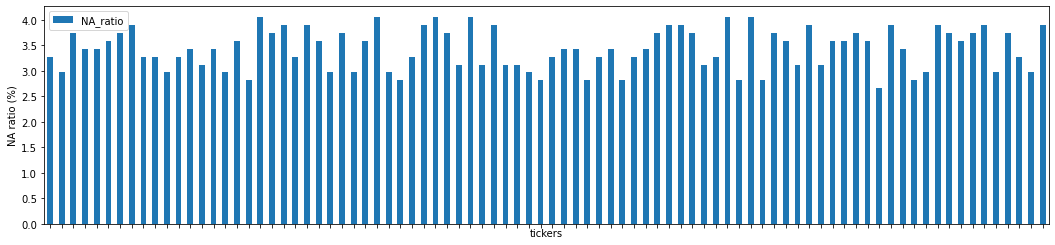

In [8]:
NA_df.plot.bar(rot=0, figsize=(18,4))
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.xlabel('tickers')
plt.ylabel('NA ratio (%)')
plt.show()
plt.close()

In [9]:
def impute_data(column_name):
    index = stock_price_df.index.values[0]
    price_na_index = np.where(stock_price_df[column_name].isnull())[0]
    for i in price_na_index :
        stock_price_df[column_name][i] = stock_price_df[column_name][i-1]

In [10]:
for item in stock_price_df.columns :
    impute_data(item)

In [11]:
# Final Check for NaN
for item in stock_price_df.columns :
    if stock_price_df[item].isnull().values.any() :
        print('stock price data of '+item+' still has NaN')
print("END OF CHECKING. NO NA REMAINING")

END OF CHECKING. NO NA REMAINING


In [12]:
stock_price_df.to_csv("stock18_price.csv",index_label='Date')

In [13]:
df = pd.read_csv("stock18_price.csv")
universe = list(df.columns.values[1:])
print("stock18_price shape: " + str(df.shape))
print(universe)

stock18_price shape: (640, 87)
['SLB', 'XOM', 'CME', 'MPC', 'V', 'MCD', 'LUV', 'AVGO', 'PFE', 'TGT', 'TWTR', 'CVX', 'GOOGL', 'DIS', 'EBAY', 'QCOM', 'MRK', 'TSLA', 'CBOE', 'BIIB', 'GOOG', 'HD', 'TSN', 'HPQ', 'F', 'MA', 'AAL', 'CMCSA', 'CB', 'GS', 'GILD', 'IBM', 'VLO', 'HON', 'ABT', 'KO', 'TRV', 'CVS', 'LMT', 'FCX', 'WMT', 'BA', 'INTC', 'VZ', 'JNJ', 'OXY', 'MSFT', 'KHC', 'WBA', 'NVDA', 'CAT', 'AIG', 'PG', 'AMGN', 'MET', 'MAR', 'WFC', 'DAL', 'LLY', 'AAPL', 'TMO', 'AMZN', 'TMUS', 'PEP', 'JPM', 'ALB', 'CSCO', 'KR', 'FDX', 'MMM', 'UAL', 'FB', 'XRX', 'GM', 'NFLX', 'BAC', 'UNH', 'REGN', 'ABBV', 'SO', 'COP', 'GE', 'AXP', 'NKE', 'T', 'BLK']


In [14]:
portfolio = universe
print("Portfolio size: " + str(len(portfolio)) + '\n' + str(portfolio))

Portfolio size: 86
['SLB', 'XOM', 'CME', 'MPC', 'V', 'MCD', 'LUV', 'AVGO', 'PFE', 'TGT', 'TWTR', 'CVX', 'GOOGL', 'DIS', 'EBAY', 'QCOM', 'MRK', 'TSLA', 'CBOE', 'BIIB', 'GOOG', 'HD', 'TSN', 'HPQ', 'F', 'MA', 'AAL', 'CMCSA', 'CB', 'GS', 'GILD', 'IBM', 'VLO', 'HON', 'ABT', 'KO', 'TRV', 'CVS', 'LMT', 'FCX', 'WMT', 'BA', 'INTC', 'VZ', 'JNJ', 'OXY', 'MSFT', 'KHC', 'WBA', 'NVDA', 'CAT', 'AIG', 'PG', 'AMGN', 'MET', 'MAR', 'WFC', 'DAL', 'LLY', 'AAPL', 'TMO', 'AMZN', 'TMUS', 'PEP', 'JPM', 'ALB', 'CSCO', 'KR', 'FDX', 'MMM', 'UAL', 'FB', 'XRX', 'GM', 'NFLX', 'BAC', 'UNH', 'REGN', 'ABBV', 'SO', 'COP', 'GE', 'AXP', 'NKE', 'T', 'BLK']


## Prepare the data

In [30]:
window = 10 # OG was 100
def rolling_corr(item1,item2) :
    #import data
    stock_price_df = pd.read_csv("stock18_price.csv")
    pd.to_datetime(stock_price_df['Date'], format='%Y-%m-%d')
    stock_price_df = stock_price_df.set_index(pd.DatetimeIndex(stock_price_df['Date']))
    
    #calculate
    df_pair = pd.concat([stock_price_df[item1], stock_price_df[item2]], axis=1)
    df_pair.columns = [item1,item2]
    df_corr = df_pair[item1].rolling(window=window).corr(df_pair[item2])
    return df_corr


In [31]:
index_list = []
for _ in range(window):
    indices = []
    for k in range(_, 590,window):
        indices.append(k)
    index_list.append(indices)


In [32]:
data_matrix = []
count = 0
for i in range(86):
    for j in range(85-i):
        a = portfolio[i]
        b = portfolio[85-j]
        file_name = a + '_' + b
            
        corr_series = rolling_corr(a, b)[(window-1):]
        for _ in range(window):
            corr_strided = list(corr_series[index_list[_]][:24]).copy()
            data_matrix.append(corr_strided)
            count+=1
            if count % 1000 == 0 :
                print(str(count)+' items preprocessed')
              

1000 items preprocessed
2000 items preprocessed
3000 items preprocessed
4000 items preprocessed
5000 items preprocessed
6000 items preprocessed
7000 items preprocessed
8000 items preprocessed
9000 items preprocessed
10000 items preprocessed
11000 items preprocessed
12000 items preprocessed
13000 items preprocessed
14000 items preprocessed
15000 items preprocessed
16000 items preprocessed
17000 items preprocessed
18000 items preprocessed
19000 items preprocessed
20000 items preprocessed
21000 items preprocessed
22000 items preprocessed
23000 items preprocessed
24000 items preprocessed
25000 items preprocessed
26000 items preprocessed
27000 items preprocessed
28000 items preprocessed
29000 items preprocessed
30000 items preprocessed
31000 items preprocessed
32000 items preprocessed
33000 items preprocessed
34000 items preprocessed
35000 items preprocessed
36000 items preprocessed


In [34]:
data_matrix = np.transpose(data_matrix)
data_dictionary = {}
for i in range(len(data_matrix)):
    data_dictionary[str(i)] = data_matrix[i]
data_df = pd.DataFrame.from_dict(data_dictionary, orient='index')
#data_df = pd.DataFrame(data_dictionary)
data_df.to_csv('dataset.csv')